In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K5P21\K5P21_cor.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_12680\1334988122.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5P21\K5P21_cor.csv', ";")


K5F3.PV  K0P125.PV  K5Q2_2.PV  K5FCV4_2I.PV   K5P6.PV  K5PCV6I.PV  \
0    2977.827   67.44596   494.0474      9.330159  1.653008    95.01530   
1    2927.134   66.87718   506.2909      9.489755  1.680137    95.56659   
2    2900.535   66.75259  1034.6810      6.942690  1.681726    95.65205   
3    2890.979   66.65165  1634.3180      9.949176  1.680142    95.75198   
4    2885.439   66.53733  3242.3850      6.283673  1.680123    95.80904   
..        ...        ...        ...           ...       ...         ...   
124  1977.031   68.19244   352.5026      5.466286  0.670175    94.87848   
125  1973.890   68.22311   370.7700      5.720784  0.672425    95.09186   
126  1971.471   68.87460   325.4563      9.966478  0.646166    95.52306   
127  1944.042   68.73576   247.8441      9.911775  0.661758    95.13222   
128  1921.048   68.95270   328.4229      9.958347  0.620163    95.53967   

     K5PCV17_1I.PV  K5P17_1.PV  K5PCV17_2I.PV  K5P17_2.PV  ...  K5P18_2.PV  \
0         70.45521   10.317210       98.21707   10.096680  ...   -84.34444   
1         70.74840   10.316650       98.50018   10.095040  ...   -83.30565   
2         71.29128   10.396300       98.71431   10.159540  ...   -80.85193   
3         71.19357   10.282540       98.86819   10.056530  ...   -81.47894   
4         71.31487   10.291150       98.72354   10.059570  ...   -80.22286   
..             ...         ...            ...         ...  ...         ...   
124       70.88206    4.921059       98.32474    4.795014  ...   -68.80238   
125       71.01438    4.939093       98.45263    4.807625  ...   -68.05803   
126       70.69131    4.888418       98.41850    4.764278  ...   -68.44057   
127       70.55723    4.797123       98.35905    4.663934  ...   -69.23579   
128       70.65926    4.653776       98.40217    4.534199  ...   -67.85905   

     K5P23.PV  K5P24.PV  K5P20.PV  K5T5_1.PV  K5T5_2.PV  K5T18_1.PV  \
0    1.298635  1.424265 -724.3501   614.5725   748.4112    248.8402   
1    1.315201  1.443824 -724.7084   610.7068   741.5828    248.9852   
2    1.285830  1.444966 -725.3846   607.5529   737.7582    248.1174   
3    1.294286  1.443027 -725.3129   607.7937   737.0858    248.4443   
4    1.288446  1.443438 -725.4376   606.9885   735.4639    247.8035   
..        ...       ...       ...        ...        ...         ...   
124  0.507902  0.574975 -839.7950   562.1282   648.2133    202.7271   
125  0.505261  0.575616 -838.7809   560.1978   647.1981    203.8302   
126  0.493084  0.555330 -840.9062   559.7174   647.0200    200.7711   
127  0.508799  0.569326 -839.2973   557.9197   644.5317    201.3916   
128  0.473790  0.532216 -844.0361   555.1661   641.0065    199.5653   

     K5T8_4.PV  K5T8_5.PV  K5T8_6.PV  
0    104.83760  113.14160   164.9000  
1    107.35540  115.38960   166.7137  
2    109.34810  117.13710   167.3322  
3    109.89130  117.58730   167.7440  
4    110.68530  118.20740   167.9377  
..         ...        ...        ...  
124   93.21183   97.39230   140.6240  
125   93.18359   97.34921   140.9064  
126   91.07391   94.88878   138.5038  
127   90.42651   93.93913   138.3448  
128   90.92519   94.66339   138.0215  

[129 rows x 52 columns]

<AxesSubplot:>

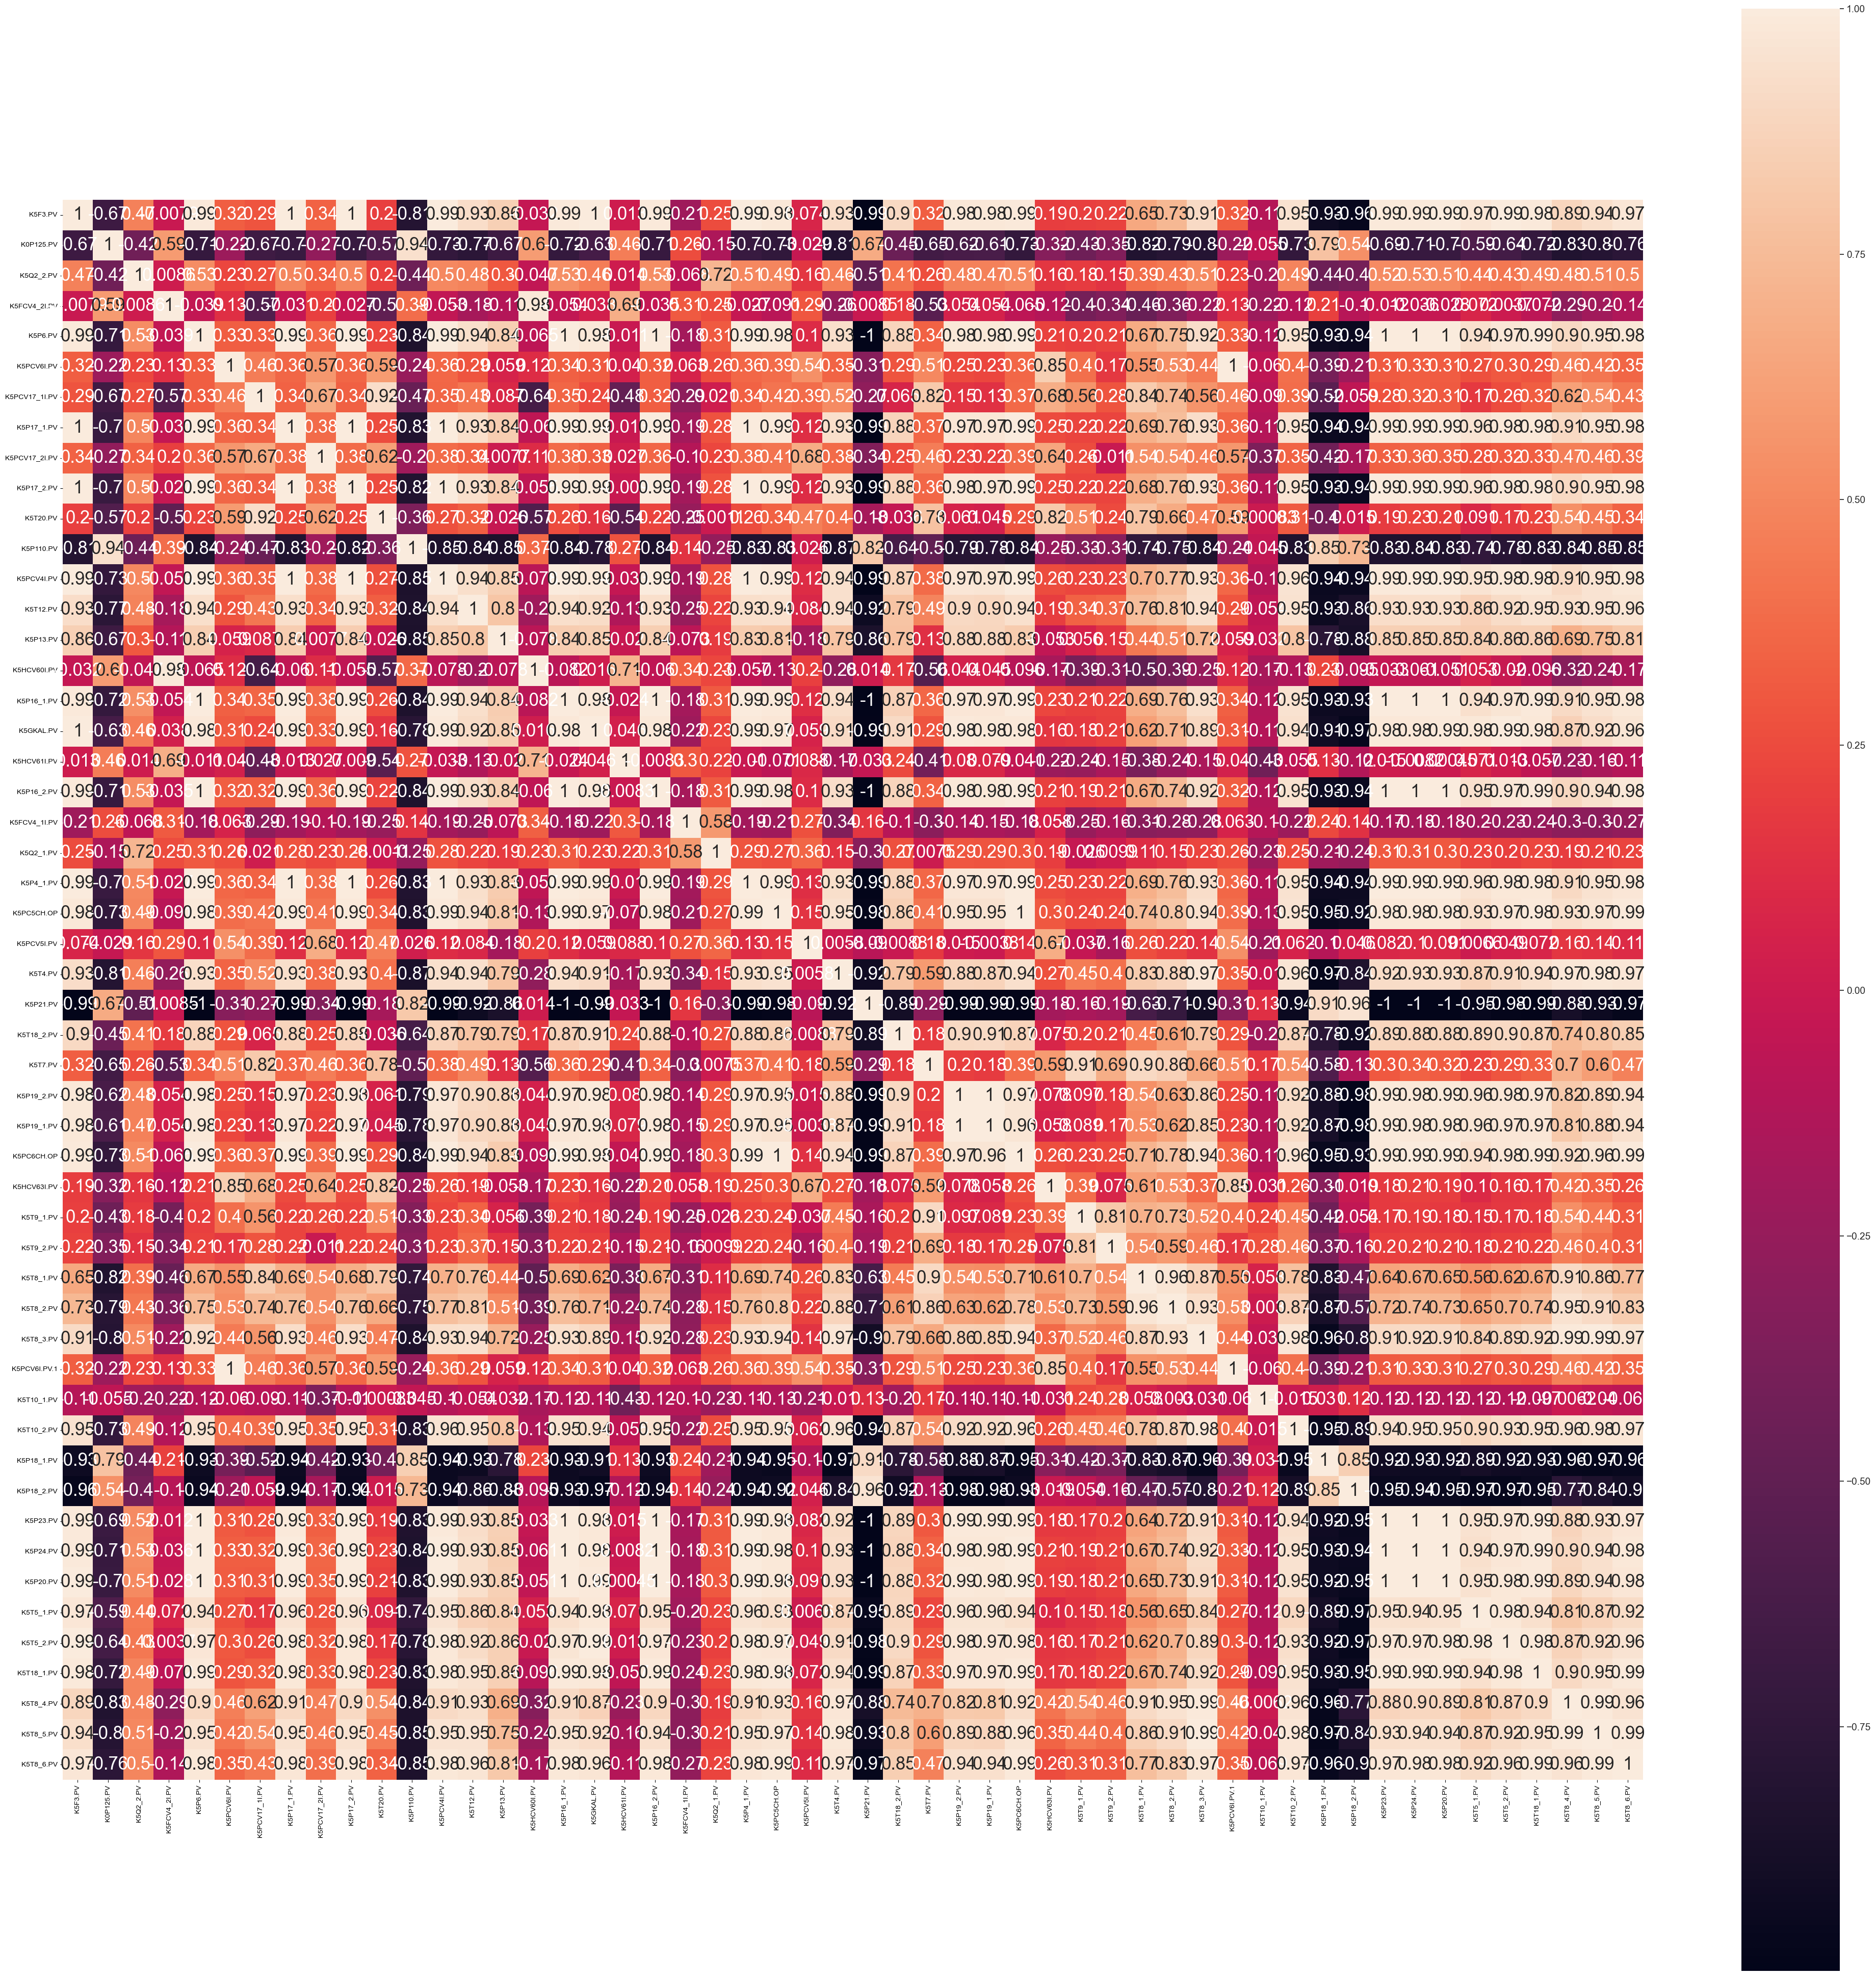

In [3]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [5]:
df = pd.read_csv('..\Initial_data\K5P21\K5P21.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_12680\2235584224.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5P21\K5P21.csv', ";")


K5P21.PV  K5P18_2.PV
0   -508.8642   -84.34444
1   -508.6351   -83.30565
2   -501.2698   -81.47894
3   -499.6873   -80.85193
4   -498.9940   -80.22286
..        ...         ...
124 -253.6989   -68.78606
125 -253.6189   -68.80238
126 -252.7853   -68.05803
127 -252.7211   -68.44057
128 -246.0119   -67.85905

[129 rows x 2 columns]

In [6]:
df=df.dropna()
df=df.round(3)
df

K5P21.PV  K5P18_2.PV
0    -508.864     -84.344
1    -508.635     -83.306
2    -501.270     -81.479
3    -499.687     -80.852
4    -498.994     -80.223
..        ...         ...
124  -253.699     -68.786
125  -253.619     -68.802
126  -252.785     -68.058
127  -252.721     -68.441
128  -246.012     -67.859

[129 rows x 2 columns]

In [14]:
y = df.drop(['K5P18_2.PV'], axis=1)
x = df.drop(['K5P21.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(-60, -90, 100)[:, np.newaxis]

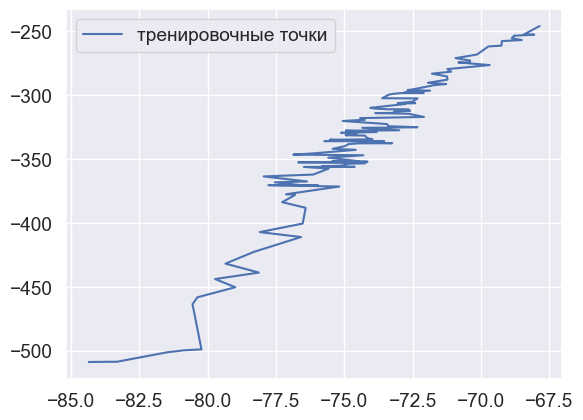

In [15]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


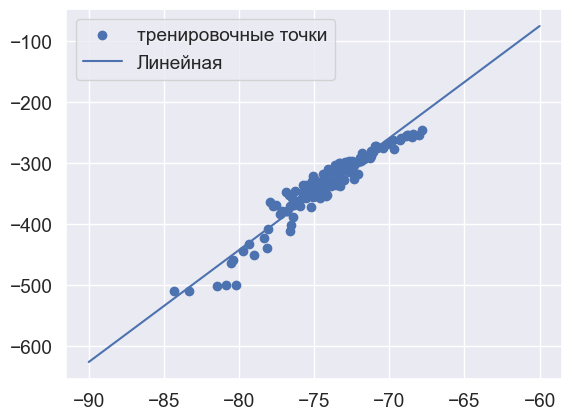

array([0.86538508, 0.94757348])

In [16]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)

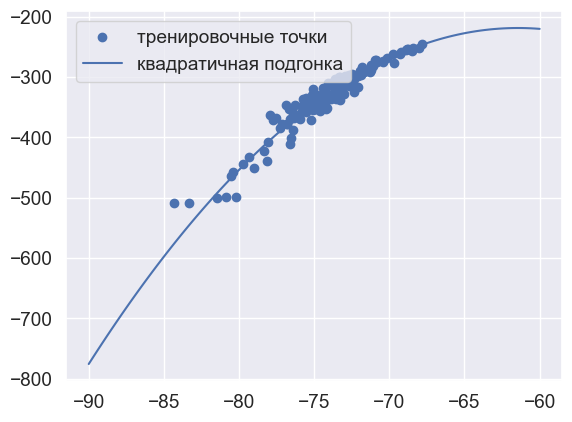

array([0.86538508, 0.94757348])

In [17]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

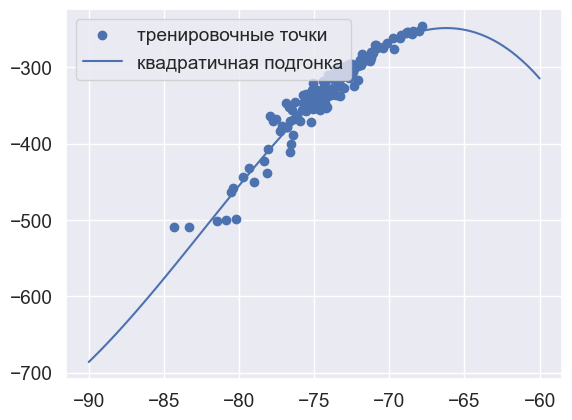

array([0.86538508, 0.94757348])

In [18]:
pr_3 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(X_train)   
pr_3.fit(X_cub, y_train)
y_pr = pr_3.predict(cube.fit_transform(task))
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_3, X_test, y_test, cv=2)

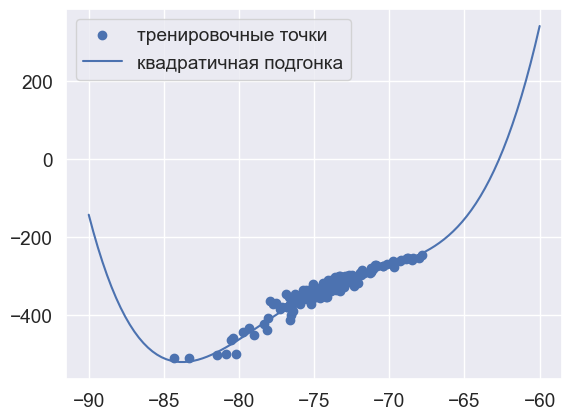

array([0.86538508, 0.94757348])

In [19]:
pr_4 = LinearRegression()
Fig = PolynomialFeatures(degree=4)
X_15 = Fig.fit_transform(X_train)   
pr_4.fit(X_15, y_train)
y_pr_4 = pr_4.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_4, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_4, X_test, y_test, cv=2)

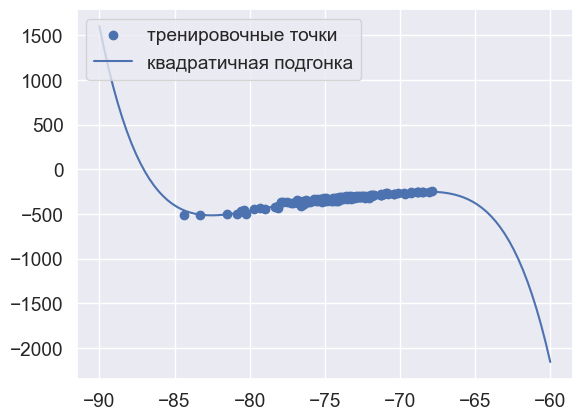

array([0.86538508, 0.94757348])

In [20]:
pr_5 = LinearRegression()
Fig = PolynomialFeatures(degree=5)
X_5 = Fig.fit_transform(X_train)   
pr_5.fit(X_5, y_train)
y_pr_5 = pr_5.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_5, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_5, X_test, y_test, cv=2)

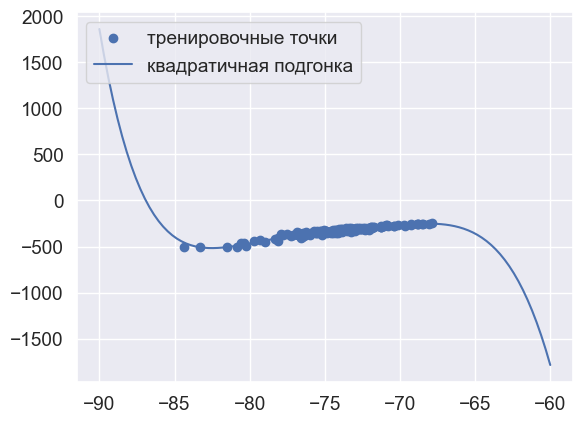

array([0.86538508, 0.94757348])

In [21]:
pr_6 = LinearRegression()
Fig = PolynomialFeatures(degree=6)
X_6 = Fig.fit_transform(X_train)   
pr_6.fit(X_6, y_train)
y_pr_6 = pr_6.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_6, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_6, X_test, y_test, cv=2)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


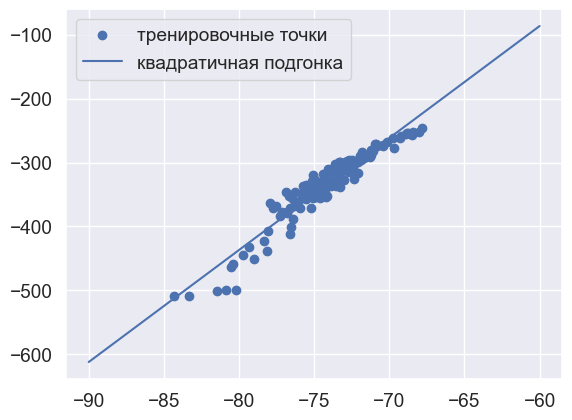

0.9167319281661267

In [23]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

In [24]:
import pickle
filename = '../model/K5P21.sav'
pickle.dump(pr, open(filename, 'wb'))

In [25]:
loaded_model = pickle.load(open("../model/K5P21.sav", 'rb'))

In [26]:
task2 = {'K5P18_2.PV':[-67]}
df2 = pd.DataFrame(data=task2)
df2

K5P18_2.PV
0         -67

In [28]:
loaded_model.predict(quadratic.fit_transform(df2))

array([[-239.888688]])